In [1]:
import pandas as pd
import mne
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
df = pd.read_csv('data/PGES-data-v8.csv')
df

,PATIENT ID,Seizure,Date,EEG start,EEG end,Clinical start,Clinical end,PI start,PI end,PI duration,ACM PI start,ACM PI end,ACM PI duration,ACM PI threshold start,ACM PI threshold end,ACM PI threshold duration,gender,age,epilepsy type,GCTS type,STATE OF WAKEFULNESS,sleep stage,DURATION OF TONIC PHASE,DURATION OF CLONIC PHASE,PGES,PGES duration,PGES>20 seconds
0,KCL05,S2,14/10/2017,02:32:13,02:33:44,02:32:46,02:33:44,02:33:45,02:50:46,00:17:01,03:39:10,03:57:43,00:18:33,02:33:44,02:52:17,00:18:33,1.0,65.0,0.0,3.0,1.0,2.0,15.0,29.0,1.0,64.0,1.0
1,KCL08,S1,09/11/2017,06:01:18,06:02:17,06:01:18,06:02:17,06:02:18,06:12:16,00:09:58,06:01:53,06:13:31,00:11:38,06:02:17,06:13:51,00:11:34,1.0,38.0,3.0,1.0,1.0,2.0,13.0,26.0,1.0,21.0,1.0
2,KCL19,S1,07/02/2018,07:12:12,07:14:04,07:12:13,07:14:04,07:14:03,07:14:47,00:00:44,07:14:26,07:17:05,00:02:39,07:14:04,07:14:12,00:00:08,1.0,33.0,1.0,3.0,0.0,NaN,NaN,68.0,0.0,NaN,0.0
3,KCL19,S3,07/02/2018,10:18:17,10:20:17,10:18:15,10:20:17,10:20:17,10:20:50,00:00:33,10:20:24,10:21:16,00:00:52,10:20:17,10:21:30,00:01:13,1.0,33.0,1.0,3.0,0.0,NaN,13.0,84.0,0.0,NaN,0.0
4,KCL41,S1 p.i. agitation,07/06/2018,15:49:10,15:53:16,15:49:23,15:53:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,32.0,1.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
5,KCL47,S1,25/07/2018,02:06:16,02:09:31,02:06:20,02:09:30,02:09:31,02:10:51,00:01:20,02:09:10,02:12:54,00:03:44,02:09:30,02:13:15,00:03:45,0.0,38.0,3.0,1.0,1.0,2.0,54.0,60.0,1.0,82.0,1.0
6,KCL47,S2,25/07/2018,05:13:44,05:16:31,05:13:54,05:16:02,05:16:31,05:17:34,00:01:03,05:16:16,05:17:53,00:01:37,05:16:02,05:18:17,00:02:15,0.0,38.0,3.0,1.0,1.0,2.0,31.0,85.0,1.0,60.0,1.0
7,KCL51,S1 p.i. agitation,04/10/2018,14:23:35,14:25:03,14:23:35,14:25:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,1.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
8,KCL63,NaN,20/03/2019,NaN,NaN,15:00:35,15:05:35,15:05:35,15:09:11,00:03:36,15:05:40,15:11:36,00:05:56,15:05:35,15:14:28,00:08:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KCL71,NaN,26/08/2019,NaN,NaN,02:10:30,02:13:29,02:13:29,02:27:01,00:13:32,02:13:45,02:26:53,00:13:08,02:13:29,02:26:57,00:13:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.Date = pd.to_datetime(df.Date)
for col in df.columns[3:16]:
    df[col] = pd.to_datetime(df[col])

In [5]:
df

,PATIENT ID,Seizure,Date,EEG start,EEG end,Clinical start,Clinical end,PI start,PI end,PI duration,ACM PI start,ACM PI end,ACM PI duration,ACM PI threshold start,ACM PI threshold end,ACM PI threshold duration,gender,age,epilepsy type,GCTS type,STATE OF WAKEFULNESS,sleep stage,DURATION OF TONIC PHASE,DURATION OF CLONIC PHASE,PGES,PGES duration,PGES>20 seconds
0,KCL05,S2,2017-10-14,2023-02-17 02:32:13,2023-02-17 02:33:44,2023-02-17 02:32:46,2023-02-17 02:33:44,2023-02-17 02:33:45,2023-02-17 02:50:46,2023-02-17 00:17:01,2023-02-17 03:39:10,2023-02-17 03:57:43,2023-02-17 00:18:33,2023-02-17 02:33:44,2023-02-17 02:52:17,2023-02-17 00:18:33,1.0,65.0,0.0,3.0,1.0,2.0,15.0,29.0,1.0,64.0,1.0
1,KCL08,S1,2017-09-11,2023-02-17 06:01:18,2023-02-17 06:02:17,2023-02-17 06:01:18,2023-02-17 06:02:17,2023-02-17 06:02:18,2023-02-17 06:12:16,2023-02-17 00:09:58,2023-02-17 06:01:53,2023-02-17 06:13:31,2023-02-17 00:11:38,2023-02-17 06:02:17,2023-02-17 06:13:51,2023-02-17 00:11:34,1.0,38.0,3.0,1.0,1.0,2.0,13.0,26.0,1.0,21.0,1.0
2,KCL19,S1,2018-07-02,2023-02-17 07:12:12,2023-02-17 07:14:04,2023-02-17 07:12:13,2023-02-17 07:14:04,2023-02-17 07:14:03,2023-02-17 07:14:47,2023-02-17 00:00:44,2023-02-17 07:14:26,2023-02-17 07:17:05,2023-02-17 00:02:39,2023-02-17 07:14:04,2023-02-17 07:14:12,2023-02-17 00:00:08,1.0,33.0,1.0,3.0,0.0,NaN,NaN,68.0,0.0,NaN,0.0
3,KCL19,S3,2018-07-02,2023-02-17 10:18:17,2023-02-17 10:20:17,2023-02-17 10:18:15,2023-02-17 10:20:17,2023-02-17 10:20:17,2023-02-17 10:20:50,2023-02-17 00:00:33,2023-02-17 10:20:24,2023-02-17 10:21:16,2023-02-17 00:00:52,2023-02-17 10:20:17,2023-02-17 10:21:30,2023-02-17 00:01:13,1.0,33.0,1.0,3.0,0.0,NaN,13.0,84.0,0.0,NaN,0.0
4,KCL41,S1 p.i. agitation,2018-07-06,2023-02-17 15:49:10,2023-02-17 15:53:16,2023-02-17 15:49:23,2023-02-17 15:53:16,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0.0,32.0,1.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
5,KCL47,S1,2018-07-25,2023-02-17 02:06:16,2023-02-17 02:09:31,2023-02-17 02:06:20,2023-02-17 02:09:30,2023-02-17 02:09:31,2023-02-17 02:10:51,2023-02-17 00:01:20,2023-02-17 02:09:10,2023-02-17 02:12:54,2023-02-17 00:03:44,2023-02-17 02:09:30,2023-02-17 02:13:15,2023-02-17 00:03:45,0.0,38.0,3.0,1.0,1.0,2.0,54.0,60.0,1.0,82.0,1.0
6,KCL47,S2,2018-07-25,2023-02-17 05:13:44,2023-02-17 05:16:31,2023-02-17 05:13:54,2023-02-17 05:16:02,2023-02-17 05:16:31,2023-02-17 05:17:34,2023-02-17 00:01:03,2023-02-17 05:16:16,2023-02-17 05:17:53,2023-02-17 00:01:37,2023-02-17 05:16:02,2023-02-17 05:18:17,2023-02-17 00:02:15,0.0,38.0,3.0,1.0,1.0,2.0,31.0,85.0,1.0,60.0,1.0
7,KCL51,S1 p.i. agitation,2018-04-10,2023-02-17 14:23:35,2023-02-17 14:25:03,2023-02-17 14:23:35,2023-02-17 14:25:03,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1.0,31.0,1.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
8,KCL63,NaN,2019-03-20,NaT,NaT,2023-02-17 15:00:35,2023-02-17 15:05:35,2023-02-17 15:05:35,2023-02-17 15:09:11,2023-02-17 00:03:36,2023-02-17 15:05:40,2023-02-17 15:11:36,2023-02-17 00:05:56,2023-02-17 15:05:35,2023-02-17 15:14:28,2023-02-17 00:08:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KCL71,NaN,2019-08-26,NaT,NaT,2023-02-17 02:10:30,2023-02-17 02:13:29,2023-02-17 02:13:29,2023-02-17 02:27:01,2023-02-17 00:13:32,2023-02-17 02:13:45,2023-02-17 02:26:53,2023-02-17 00:13:08,2023-02-17 02:13:29,2023-02-17 02:26:57,2023-02-17 00:13:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
eeg = df['EEG end'] - df['EEG start']
clinical = df['Clinical end'] - df['Clinical start']
pi = df['PI end'] - df['PI start']
acm_pi = df['ACM PI end'] - df['ACM PI start']
acm_thresh_pi = df['ACM PI threshold end'] - df['ACM PI threshold start']

In [7]:
df_dict = {'patient_id':df['PATIENT ID'], 
           'date':df['Date'], 
           'eeg_duration':[i.seconds for i in eeg], 
           'clinical_duration':[i.seconds for i in clinical], 
           'pi_duration':[i.seconds for i in pi], 
           'acm_pi_duration':[i.seconds for i in acm_pi], 
           'acm_thresh_pi':[i.seconds for i in acm_thresh_pi], 
           }

In [8]:
df_1 = pd.DataFrame.from_dict(df_dict)

In [9]:
df_full = pd.concat([df_1, df.loc[:,df.columns[16:]]], axis = 1)

In [10]:
df_full

,patient_id,date,eeg_duration,clinical_duration,pi_duration,acm_pi_duration,acm_thresh_pi,gender,age,epilepsy type,GCTS type,STATE OF WAKEFULNESS,sleep stage,DURATION OF TONIC PHASE,DURATION OF CLONIC PHASE,PGES,PGES duration,PGES>20 seconds
0,KCL05,2017-10-14,91.0,58.0,1021.0,1113.0,1113.0,1.0,65.0,0.0,3.0,1.0,2.0,15.0,29.0,1.0,64.0,1.0
1,KCL08,2017-09-11,59.0,59.0,598.0,698.0,694.0,1.0,38.0,3.0,1.0,1.0,2.0,13.0,26.0,1.0,21.0,1.0
2,KCL19,2018-07-02,112.0,111.0,44.0,159.0,8.0,1.0,33.0,1.0,3.0,0.0,NaN,NaN,68.0,0.0,NaN,0.0
3,KCL19,2018-07-02,120.0,122.0,33.0,52.0,73.0,1.0,33.0,1.0,3.0,0.0,NaN,13.0,84.0,0.0,NaN,0.0
4,KCL41,2018-07-06,246.0,233.0,NaN,NaN,NaN,0.0,32.0,1.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
5,KCL47,2018-07-25,195.0,190.0,80.0,224.0,225.0,0.0,38.0,3.0,1.0,1.0,2.0,54.0,60.0,1.0,82.0,1.0
6,KCL47,2018-07-25,167.0,128.0,63.0,97.0,135.0,0.0,38.0,3.0,1.0,1.0,2.0,31.0,85.0,1.0,60.0,1.0
7,KCL51,2018-04-10,88.0,88.0,NaN,NaN,NaN,1.0,31.0,1.0,3.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
8,KCL63,2019-03-20,NaN,300.0,216.0,356.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KCL71,2019-08-26,NaN,179.0,812.0,788.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_full = df_full.drop(columns=['sleep stage'])

In [12]:
cols = []
for i in df_full.columns:
    new = i.rstrip(' ')
    new = new.replace(' ', '_')
    new = new.replace('>', '_')
    new = new.lower()
    cols.append(new)
cols

['patient_id',
 'date',
 'eeg_duration',
 'clinical_duration',
 'pi_duration',
 'acm_pi_duration',
 'acm_thresh_pi',
 'gender',
 'age',
 'epilepsy_type',
 'gcts_type',
 'state_of_wakefulness',
 'duration_of_tonic_phase',
 'duration_of_clonic_phase',
 'pges',
 'pges_duration',
 'pges_20_seconds']

In [13]:
df_full = df_full.rename(columns=dict(zip(df_full.columns, cols)))

In [14]:
df_full

,patient_id,date,eeg_duration,clinical_duration,pi_duration,acm_pi_duration,acm_thresh_pi,gender,age,epilepsy_type,gcts_type,state_of_wakefulness,duration_of_tonic_phase,duration_of_clonic_phase,pges,pges_duration,pges_20_seconds
0,KCL05,2017-10-14,91.0,58.0,1021.0,1113.0,1113.0,1.0,65.0,0.0,3.0,1.0,15.0,29.0,1.0,64.0,1.0
1,KCL08,2017-09-11,59.0,59.0,598.0,698.0,694.0,1.0,38.0,3.0,1.0,1.0,13.0,26.0,1.0,21.0,1.0
2,KCL19,2018-07-02,112.0,111.0,44.0,159.0,8.0,1.0,33.0,1.0,3.0,0.0,NaN,68.0,0.0,NaN,0.0
3,KCL19,2018-07-02,120.0,122.0,33.0,52.0,73.0,1.0,33.0,1.0,3.0,0.0,13.0,84.0,0.0,NaN,0.0
4,KCL41,2018-07-06,246.0,233.0,NaN,NaN,NaN,0.0,32.0,1.0,3.0,0.0,NaN,NaN,0.0,NaN,0.0
5,KCL47,2018-07-25,195.0,190.0,80.0,224.0,225.0,0.0,38.0,3.0,1.0,1.0,54.0,60.0,1.0,82.0,1.0
6,KCL47,2018-07-25,167.0,128.0,63.0,97.0,135.0,0.0,38.0,3.0,1.0,1.0,31.0,85.0,1.0,60.0,1.0
7,KCL51,2018-04-10,88.0,88.0,NaN,NaN,NaN,1.0,31.0,1.0,3.0,0.0,NaN,NaN,0.0,NaN,0.0
8,KCL63,2019-03-20,NaN,300.0,216.0,356.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KCL71,2019-08-26,NaN,179.0,812.0,788.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


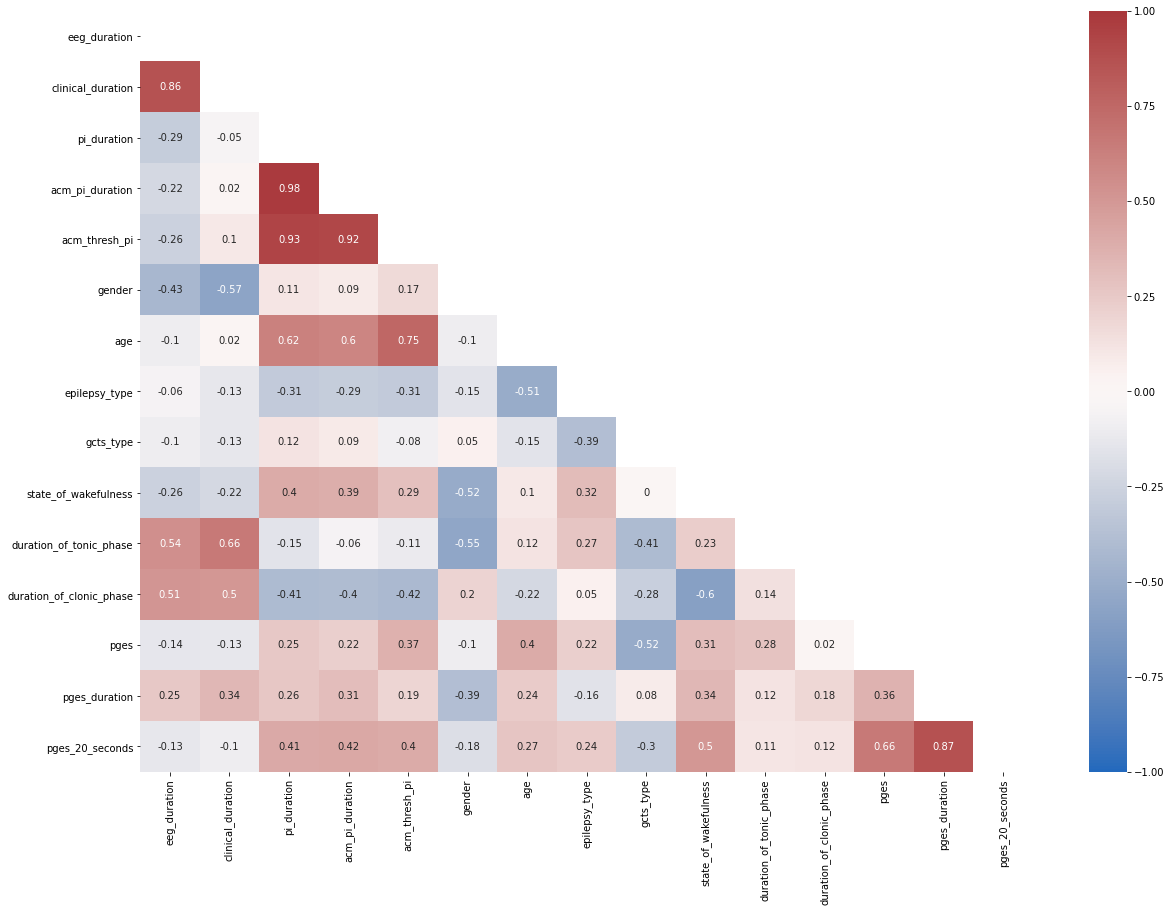

In [15]:
matrix = df_full.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(20, 14))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, cmap='vlag', mask=mask)
plt.savefig('pges_initial_heatmap.png')
plt.show()

# We start on linear regression 

In [202]:
df_mod = df_full.fillna(df_full.median())

In [203]:
df_mod

,patient_id,date,eeg_duration,clinical_duration,pi_duration,acm_pi_duration,acm_thresh_pi,gender,age,epilepsy_type,gcts_type,state_of_wakefulness,duration_of_tonic_phase,duration_of_clonic_phase,pges,pges_duration,pges_20_seconds
0,KCL05,2017-10-14,91.0,58.0,1021.0,1113.0,1113.0,1.0,65.0,0.0,3.0,1.0,15.0,29.0,1.0,64.0,1.0
1,KCL08,2017-09-11,59.0,59.0,598.0,698.0,694.0,1.0,38.0,3.0,1.0,1.0,13.0,26.0,1.0,21.0,1.0
2,KCL19,2018-07-02,112.0,111.0,44.0,159.0,8.0,1.0,33.0,1.0,3.0,0.0,15.0,68.0,0.0,45.5,0.0
3,KCL19,2018-07-02,120.0,122.0,33.0,52.0,73.0,1.0,33.0,1.0,3.0,0.0,13.0,84.0,0.0,45.5,0.0
4,KCL41,2018-07-06,246.0,233.0,73.0,145.0,132.0,0.0,32.0,1.0,3.0,0.0,15.0,51.5,0.0,45.5,0.0
5,KCL47,2018-07-25,195.0,190.0,80.0,224.0,225.0,0.0,38.0,3.0,1.0,1.0,54.0,60.0,1.0,82.0,1.0
6,KCL47,2018-07-25,167.0,128.0,63.0,97.0,135.0,0.0,38.0,3.0,1.0,1.0,31.0,85.0,1.0,60.0,1.0
7,KCL51,2018-04-10,88.0,88.0,73.0,145.0,132.0,1.0,31.0,1.0,3.0,0.0,15.0,51.5,0.0,45.5,0.0
8,KCL63,2019-03-20,114.0,300.0,216.0,356.0,533.0,1.0,33.5,2.0,3.0,0.5,15.0,51.5,1.0,45.5,0.0
9,KCL71,2019-08-26,114.0,179.0,812.0,788.0,808.0,1.0,33.5,2.0,3.0,0.5,15.0,51.5,1.0,45.5,0.0


In [204]:
for i in df_mod.index:
    if df_mod.pges[i] == 0.:
        df_mod.pges_duration[i] = 0.

In [205]:
df_mod

,patient_id,date,eeg_duration,clinical_duration,pi_duration,acm_pi_duration,acm_thresh_pi,gender,age,epilepsy_type,gcts_type,state_of_wakefulness,duration_of_tonic_phase,duration_of_clonic_phase,pges,pges_duration,pges_20_seconds
0,KCL05,2017-10-14,91.0,58.0,1021.0,1113.0,1113.0,1.0,65.0,0.0,3.0,1.0,15.0,29.0,1.0,64.0,1.0
1,KCL08,2017-09-11,59.0,59.0,598.0,698.0,694.0,1.0,38.0,3.0,1.0,1.0,13.0,26.0,1.0,21.0,1.0
2,KCL19,2018-07-02,112.0,111.0,44.0,159.0,8.0,1.0,33.0,1.0,3.0,0.0,15.0,68.0,0.0,0.0,0.0
3,KCL19,2018-07-02,120.0,122.0,33.0,52.0,73.0,1.0,33.0,1.0,3.0,0.0,13.0,84.0,0.0,0.0,0.0
4,KCL41,2018-07-06,246.0,233.0,73.0,145.0,132.0,0.0,32.0,1.0,3.0,0.0,15.0,51.5,0.0,0.0,0.0
5,KCL47,2018-07-25,195.0,190.0,80.0,224.0,225.0,0.0,38.0,3.0,1.0,1.0,54.0,60.0,1.0,82.0,1.0
6,KCL47,2018-07-25,167.0,128.0,63.0,97.0,135.0,0.0,38.0,3.0,1.0,1.0,31.0,85.0,1.0,60.0,1.0
7,KCL51,2018-04-10,88.0,88.0,73.0,145.0,132.0,1.0,31.0,1.0,3.0,0.0,15.0,51.5,0.0,0.0,0.0
8,KCL63,2019-03-20,114.0,300.0,216.0,356.0,533.0,1.0,33.5,2.0,3.0,0.5,15.0,51.5,1.0,45.5,0.0
9,KCL71,2019-08-26,114.0,179.0,812.0,788.0,808.0,1.0,33.5,2.0,3.0,0.5,15.0,51.5,1.0,45.5,0.0


In [206]:
model = LinearRegression(n_jobs=-1)

## First use the pges duration as our output

In [207]:
y = df_mod.pges_duration

In [208]:
x = df_mod[['clinical_duration', 'state_of_wakefulness']]

In [209]:
model.fit(x, y)

LinearRegression(n_jobs=-1)

In [210]:
model.score(x,y)

0.260475038123941

In [211]:
model.coef_

array([ 0.10877415, 32.0123217 ])

In [212]:
def lin_metrics(x, y = y):
    model = LinearRegression(n_jobs= -1)
    model.fit(x, y)
    return model.score(x, y), model.coef_

In [252]:
features = df_mod.columns[2:14]

In [253]:
lin_dict = {}
for i in features:
    lin_dict[i] = {}
    for j in features:
        if i==j:
            continue
        lin_dict[i][j] = {}
        x = df_mod[[i, j]]
        score, coef = lin_metrics(x)
        lin_dict[i][j]['score'] = score
        lin_dict[i][j]['%s_coef'%i] = coef[0]
        lin_dict[i][j]['partner_coef'] = coef[1]

In [254]:
lin_dict

{'eeg_duration': {'clinical_duration': {'score': 0.03049318936396539,
   'eeg_duration_coef': -0.0940567630082949,
   'partner_coef': 0.10994253701628048},
  'pi_duration': {'score': 0.11712675120404725,
   'eeg_duration_coef': 0.040977826340644806,
   'partner_coef': 0.0405833950103181},
  'acm_pi_duration': {'score': 0.12675125238500162,
   'eeg_duration_coef': 0.03136842454620025,
   'partner_coef': 0.04014425106341519},
  'acm_thresh_pi': {'score': 0.12413000077455705,
   'eeg_duration_coef': 0.03907686671850317,
   'partner_coef': 0.037949871196400246},
  'gender': {'score': 0.06380349792728346,
   'eeg_duration_coef': -0.09715387779508607,
   'partner_coef': -18.097325505886282},
  'age': {'score': 0.10364515696498611,
   'eeg_duration_coef': 0.0049343165570096366,
   'partner_coef': 0.8811612538852448},
  'epilepsy_type': {'score': 0.005864777920925879,
   'eeg_duration_coef': -0.013856400236815255,
   'partner_coef': 1.629305143408118},
  'gcts_type': {'score': 0.01780971168349

In [255]:
best_lins = {}
for i in lin_dict.keys():
    df = pd.DataFrame.from_dict(lin_dict[i]).T.reset_index().rename(columns = {'index':'comparer'})
    df.to_csv('data/linr_dfs_pges_dat/%s.csv'%i)
    idx = df.score.idxmax()
    best_lins[i] = {}
    best_lins[i]['best_comparer'] = df.comparer[idx]
    best_lins[i]['score'] = df.score[idx]
    best_lins[i]['ref_coef'] = df.iloc[idx,2]
    best_lins[i]['partner_coef'] = df.partner_coef[idx]

In [256]:
df_best = pd.DataFrame.from_dict(best_lins).T
df_best.to_csv('data/linr_dfs_pges_dat/best_scores.csv')

In [257]:
df_best

,best_comparer,score,ref_coef,partner_coef
eeg_duration,state_of_wakefulness,0.228721,0.0676394,31.6639
clinical_duration,state_of_wakefulness,0.260475,0.108774,32.0123
pi_duration,state_of_wakefulness,0.252548,0.0225378,25.5533
acm_pi_duration,state_of_wakefulness,0.260115,0.0239313,25.1707
acm_thresh_pi,state_of_wakefulness,0.27265,0.0252149,25.9026
gender,state_of_wakefulness,0.219737,1.86787,30.9339
age,state_of_wakefulness,0.294978,0.75625,28.185
epilepsy_type,state_of_wakefulness,0.225222,-1.8511,31.666
gcts_type,state_of_wakefulness,0.235334,-4.20046,30
state_of_wakefulness,duration_of_clonic_phase,0.393604,47.2642,0.59124


In [258]:
df_best = df_best.sort_values(by=['score'], ascending=False)

In [259]:
df_best = df_best.drop(['state_of_wakefulness'])

In [260]:
df_best

,best_comparer,score,ref_coef,partner_coef
duration_of_clonic_phase,state_of_wakefulness,0.393604,0.59124,47.2642
age,state_of_wakefulness,0.294978,0.75625,28.185
acm_thresh_pi,state_of_wakefulness,0.27265,0.0252149,25.9026
clinical_duration,state_of_wakefulness,0.260475,0.108774,32.0123
acm_pi_duration,state_of_wakefulness,0.260115,0.0239313,25.1707
pi_duration,state_of_wakefulness,0.252548,0.0225378,25.5533
gcts_type,state_of_wakefulness,0.235334,-4.20046,30
eeg_duration,state_of_wakefulness,0.228721,0.0676394,31.6639
epilepsy_type,state_of_wakefulness,0.225222,-1.8511,31.666
duration_of_tonic_phase,state_of_wakefulness,0.221067,0.120367,29.3259


## We should try this without wakefulness to see what else is there

In [261]:
df_nowake = df_mod.drop(columns='state_of_wakefulness')
df_nowake

,patient_id,date,eeg_duration,clinical_duration,pi_duration,acm_pi_duration,acm_thresh_pi,gender,age,epilepsy_type,gcts_type,duration_of_tonic_phase,duration_of_clonic_phase,pges,pges_duration,pges_20_seconds
0,KCL05,2017-10-14,91.0,58.0,1021.0,1113.0,1113.0,1.0,65.0,0.0,3.0,15.0,29.0,1.0,64.0,1.0
1,KCL08,2017-09-11,59.0,59.0,598.0,698.0,694.0,1.0,38.0,3.0,1.0,13.0,26.0,1.0,21.0,1.0
2,KCL19,2018-07-02,112.0,111.0,44.0,159.0,8.0,1.0,33.0,1.0,3.0,15.0,68.0,0.0,0.0,0.0
3,KCL19,2018-07-02,120.0,122.0,33.0,52.0,73.0,1.0,33.0,1.0,3.0,13.0,84.0,0.0,0.0,0.0
4,KCL41,2018-07-06,246.0,233.0,73.0,145.0,132.0,0.0,32.0,1.0,3.0,15.0,51.5,0.0,0.0,0.0
5,KCL47,2018-07-25,195.0,190.0,80.0,224.0,225.0,0.0,38.0,3.0,1.0,54.0,60.0,1.0,82.0,1.0
6,KCL47,2018-07-25,167.0,128.0,63.0,97.0,135.0,0.0,38.0,3.0,1.0,31.0,85.0,1.0,60.0,1.0
7,KCL51,2018-04-10,88.0,88.0,73.0,145.0,132.0,1.0,31.0,1.0,3.0,15.0,51.5,0.0,0.0,0.0
8,KCL63,2019-03-20,114.0,300.0,216.0,356.0,533.0,1.0,33.5,2.0,3.0,15.0,51.5,1.0,45.5,0.0
9,KCL71,2019-08-26,114.0,179.0,812.0,788.0,808.0,1.0,33.5,2.0,3.0,15.0,51.5,1.0,45.5,0.0


In [262]:
features_nowake = df_nowake.columns[2:13]

In [263]:
features_nowake

Index(['eeg_duration', 'clinical_duration', 'pi_duration', 'acm_pi_duration',
       'acm_thresh_pi', 'gender', 'age', 'epilepsy_type', 'gcts_type',
       'duration_of_tonic_phase', 'duration_of_clonic_phase'],
      dtype='object')

In [264]:
lin_dict_nowake = {}
for i in features_nowake:
    lin_dict_nowake[i] = {}
    for j in features_nowake:
        if i==j:
            continue
        lin_dict_nowake[i][j] = {}
        x = df_nowake[[i, j]]
        score, coef = lin_metrics(x)
        lin_dict_nowake[i][j]['score'] = score
        lin_dict_nowake[i][j]['%s_coef'%i] = coef[0]
        lin_dict_nowake[i][j]['partner_coef'] = coef[1]

In [265]:
lin_dict_nowake

{'eeg_duration': {'clinical_duration': {'score': 0.03049318936396539,
   'eeg_duration_coef': -0.0940567630082949,
   'partner_coef': 0.10994253701628048},
  'pi_duration': {'score': 0.11712675120404725,
   'eeg_duration_coef': 0.040977826340644806,
   'partner_coef': 0.0405833950103181},
  'acm_pi_duration': {'score': 0.12675125238500162,
   'eeg_duration_coef': 0.03136842454620025,
   'partner_coef': 0.04014425106341519},
  'acm_thresh_pi': {'score': 0.12413000077455705,
   'eeg_duration_coef': 0.03907686671850317,
   'partner_coef': 0.037949871196400246},
  'gender': {'score': 0.06380349792728346,
   'eeg_duration_coef': -0.09715387779508607,
   'partner_coef': -18.097325505886282},
  'age': {'score': 0.10364515696498611,
   'eeg_duration_coef': 0.0049343165570096366,
   'partner_coef': 0.8811612538852448},
  'epilepsy_type': {'score': 0.005864777920925879,
   'eeg_duration_coef': -0.013856400236815255,
   'partner_coef': 1.629305143408118},
  'gcts_type': {'score': 0.01780971168349

In [266]:
best_lins_nowake = {}
for i in lin_dict_nowake.keys():
    df = pd.DataFrame.from_dict(lin_dict_nowake[i]).T.reset_index().rename(columns = {'index':'comparer'})
    df.to_csv('data/linr_dfs_pges_dat/%s_nowake.csv'%i)
    idx = df.score.idxmax()
    best_lins_nowake[i] = {}
    best_lins_nowake[i]['best_comparer'] = df.comparer[idx]
    best_lins_nowake[i]['score'] = df.score[idx]
    best_lins_nowake[i]['ref_coef'] = df.iloc[idx,2]
    best_lins_nowake[i]['partner_coef'] = df.partner_coef[idx]

In [267]:
df_best_nowake = pd.DataFrame.from_dict(best_lins_nowake).T
df_best_nowake.to_csv('data/linr_dfs_pges_dat/best_scores_nowake.csv')

In [268]:
df_best_nowake

,best_comparer,score,ref_coef,partner_coef
eeg_duration,acm_pi_duration,0.126751,0.0313684,0.0401443
clinical_duration,acm_pi_duration,0.141634,0.0689344,0.0391419
pi_duration,gender,0.189265,0.0441413,-18.113
acm_pi_duration,gender,0.198961,0.0437532,-17.9137
acm_thresh_pi,gender,0.212827,0.0439968,-20.226
gender,acm_thresh_pi,0.212827,-20.226,0.0439968
age,epilepsy_type,0.180706,1.33128,7.27025
epilepsy_type,age,0.180706,7.27025,1.33128
gcts_type,acm_pi_duration,0.156426,-5.94071,0.0418894
duration_of_tonic_phase,acm_thresh_pi,0.155597,0.497068,0.0384424


In [269]:
df_best_nowake = df_best_nowake.sort_values(by=['score'], ascending=False)
df_best_nowake = df_best_nowake.drop(['gender'])

In [270]:
df_best_nowake

,best_comparer,score,ref_coef,partner_coef
acm_thresh_pi,gender,0.212827,0.0439968,-20.226
acm_pi_duration,gender,0.198961,0.0437532,-17.9137
pi_duration,gender,0.189265,0.0441413,-18.113
duration_of_clonic_phase,acm_pi_duration,0.184172,0.312058,0.0497773
epilepsy_type,age,0.180706,7.27025,1.33128
age,epilepsy_type,0.180706,1.33128,7.27025
gcts_type,acm_pi_duration,0.156426,-5.94071,0.0418894
duration_of_tonic_phase,acm_thresh_pi,0.155597,0.497068,0.0384424
clinical_duration,acm_pi_duration,0.141634,0.0689344,0.0391419
eeg_duration,acm_pi_duration,0.126751,0.0313684,0.0401443


# Now we do logistic regression with PGES as our target

In [271]:
y = df_mod.pges

In [272]:
features = df_mod.columns[2:14]
features

Index(['eeg_duration', 'clinical_duration', 'pi_duration', 'acm_pi_duration',
       'acm_thresh_pi', 'gender', 'age', 'epilepsy_type', 'gcts_type',
       'state_of_wakefulness', 'duration_of_tonic_phase',
       'duration_of_clonic_phase'],
      dtype='object')

In [273]:
def log_metrics(x, y = y):
    model = LogisticRegression(n_jobs= -1)
    model.fit(x, y)
    return model.score(x, y), model.coef_

In [274]:
log_dict = {}
for i in features:
    log_dict[i] = {}
    for j in features:
        if i==j:
            continue
        log_dict[i][j] = {}
        x = df_mod[[i, j]]
        score, coef = log_metrics(x)
        log_dict[i][j]['score'] = score
        log_dict[i][j]['%s_coef'%i] = coef.flatten()[0]
        log_dict[i][j]['partner_coef'] = coef.flatten()[1]

In [275]:
best_logs = {}
for i in log_dict.keys():
    df = pd.DataFrame.from_dict(log_dict[i]).T.reset_index().rename(columns = {'index':'comparer'})
    df.to_csv('data/logr_dfs_pges_dat/%s.csv'%i)
    idx = df.score.idxmax()
    best_logs[i] = {}
    best_logs[i]['best_comparer'] = df.comparer[idx]
    best_logs[i]['score'] = df.score[idx]
    best_logs[i]['ref_coef'] = df.iloc[idx,2]
    best_logs[i]['partner_coef'] = df.partner_coef[idx]

In [276]:
df_best = pd.DataFrame.from_dict(best_logs).T
df_best.to_csv('data/logr_dfs_pges_dat/best_scores.csv')

In [277]:
df_best

,best_comparer,score,ref_coef,partner_coef
eeg_duration,gcts_type,0.782609,-0.0111986,-1.00956
clinical_duration,acm_thresh_pi,0.73913,-0.00728102,0.0133281
pi_duration,epilepsy_type,0.826087,0.0117557,0.560273
acm_pi_duration,duration_of_tonic_phase,0.782609,0.00455299,0.0685304
acm_thresh_pi,age,0.782609,0.011561,0.0774142
gender,eeg_duration,0.73913,-0.254901,-0.00840315
age,acm_thresh_pi,0.782609,0.0774142,0.011561
epilepsy_type,pi_duration,0.826087,0.560273,0.0117557
gcts_type,state_of_wakefulness,0.826087,-0.944382,0.809495
state_of_wakefulness,gcts_type,0.826087,0.809495,-0.944382


In [278]:
df_best = df_best.sort_values(by=['score'], ascending=False)

In [279]:
df_best

,best_comparer,score,ref_coef,partner_coef
pi_duration,epilepsy_type,0.826087,0.0117557,0.560273
epilepsy_type,pi_duration,0.826087,0.560273,0.0117557
gcts_type,state_of_wakefulness,0.826087,-0.944382,0.809495
state_of_wakefulness,gcts_type,0.826087,0.809495,-0.944382
eeg_duration,gcts_type,0.782609,-0.0111986,-1.00956
acm_pi_duration,duration_of_tonic_phase,0.782609,0.00455299,0.0685304
acm_thresh_pi,age,0.782609,0.011561,0.0774142
age,acm_thresh_pi,0.782609,0.0774142,0.011561
duration_of_tonic_phase,pi_duration,0.782609,0.0882124,0.010953
clinical_duration,acm_thresh_pi,0.73913,-0.00728102,0.0133281


In [280]:
df_best = df_best.drop(['pi_duration'])

In [281]:
df_best

,best_comparer,score,ref_coef,partner_coef
epilepsy_type,pi_duration,0.826087,0.560273,0.0117557
gcts_type,state_of_wakefulness,0.826087,-0.944382,0.809495
state_of_wakefulness,gcts_type,0.826087,0.809495,-0.944382
eeg_duration,gcts_type,0.782609,-0.0111986,-1.00956
acm_pi_duration,duration_of_tonic_phase,0.782609,0.00455299,0.0685304
acm_thresh_pi,age,0.782609,0.011561,0.0774142
age,acm_thresh_pi,0.782609,0.0774142,0.011561
duration_of_tonic_phase,pi_duration,0.782609,0.0882124,0.010953
clinical_duration,acm_thresh_pi,0.73913,-0.00728102,0.0133281
gender,eeg_duration,0.73913,-0.254901,-0.00840315


# Finally, let's try with pges duration above 20 seconds (pseudo-severity marker)

In [282]:
y = df_mod.pges_20_seconds

In [283]:
features = df_mod.columns[2:14]
features

Index(['eeg_duration', 'clinical_duration', 'pi_duration', 'acm_pi_duration',
       'acm_thresh_pi', 'gender', 'age', 'epilepsy_type', 'gcts_type',
       'state_of_wakefulness', 'duration_of_tonic_phase',
       'duration_of_clonic_phase'],
      dtype='object')

In [284]:
def log_metrics(x, y = y):
    model = LogisticRegression(n_jobs= -1)
    model.fit(x, y)
    return model.score(x, y), model.coef_

In [285]:
log_dict = {}
for i in features:
    log_dict[i] = {}
    for j in features:
        if i==j:
            continue
        log_dict[i][j] = {}
        x = df_mod[[i, j]]
        score, coef = log_metrics(x)
        log_dict[i][j]['score'] = score
        log_dict[i][j]['%s_coef'%i] = coef.flatten()[0]
        log_dict[i][j]['partner_coef'] = coef.flatten()[1]

In [286]:
best_logs = {}
for i in log_dict.keys():
    df = pd.DataFrame.from_dict(log_dict[i]).T.reset_index().rename(columns = {'index':'comparer'})
    df.to_csv('data/logr_dfs_pges_dat/%s.csv'%i)
    idx = df.score.idxmax()
    best_logs[i] = {}
    best_logs[i]['best_comparer'] = df.comparer[idx]
    best_logs[i]['score'] = df.score[idx]
    best_logs[i]['ref_coef'] = df.iloc[idx,2]
    best_logs[i]['partner_coef'] = df.partner_coef[idx]

In [287]:
df_best = pd.DataFrame.from_dict(best_logs).T
df_best.to_csv('data/logr_dfs_pges_dat/best_scores_20secs.csv')

In [288]:
df_best

,best_comparer,score,ref_coef,partner_coef
eeg_duration,state_of_wakefulness,0.73913,-0.00152402,1.14148
clinical_duration,duration_of_tonic_phase,0.782609,-0.0159649,0.0497525
pi_duration,gcts_type,0.73913,0.00273773,-0.822269
acm_pi_duration,gender,0.695652,0.00233502,-0.707555
acm_thresh_pi,gender,0.73913,0.0020174,-0.75223
gender,acm_thresh_pi,0.73913,-0.75223,0.0020174
age,state_of_wakefulness,0.782609,0.0496156,1.13297
epilepsy_type,gcts_type,0.782609,0.17527,-0.61541
gcts_type,epilepsy_type,0.782609,-0.61541,0.17527
state_of_wakefulness,age,0.782609,1.13297,0.0496156


In [289]:
df_best = df_best.sort_values(by=['score'], ascending=False)

In [290]:
df_best=df_best.drop(['duration_of_tonic_phase'])
df_best

,best_comparer,score,ref_coef,partner_coef
clinical_duration,duration_of_tonic_phase,0.782609,-0.0159649,0.0497525
age,state_of_wakefulness,0.782609,0.0496156,1.13297
epilepsy_type,gcts_type,0.782609,0.17527,-0.61541
gcts_type,epilepsy_type,0.782609,-0.61541,0.17527
state_of_wakefulness,age,0.782609,1.13297,0.0496156
duration_of_clonic_phase,age,0.782609,0.0195029,0.0664716
eeg_duration,state_of_wakefulness,0.73913,-0.00152402,1.14148
pi_duration,gcts_type,0.73913,0.00273773,-0.822269
acm_thresh_pi,gender,0.73913,0.0020174,-0.75223
gender,acm_thresh_pi,0.73913,-0.75223,0.0020174
